# Unsupervised and supervised Optimum-Path Forest

## Bibliotecas

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Carregando dados

In [2]:
# Caminho dos dados
datapath_breast_tissue = '/home/luis/data/uci/BreastTissue.xls'

In [3]:
data_bt = pd.read_excel(datapath_breast_tissue, sheet_name='Data', index_col='Case #')

### Lendo os dados

In [4]:
data_bt

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
Case #,,,,,,,,,,
1,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
2,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
3,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
4,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
5,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503
...,...,...,...,...,...,...,...,...,...,...
102,adi,2000.000000,0.106989,0.105418,520.222649,40087.920984,77.059161,204.090347,478.517223,2088.648870
103,adi,2600.000000,0.200538,0.208043,1063.441427,174480.476218,164.071543,418.687286,977.552367,2664.583623
104,adi,1600.000000,0.071908,-0.066323,436.943603,12655.342135,28.963331,103.732704,432.129749,1475.371534


In [5]:
data_bt.describe(include='all')

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
count,106,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
unique,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,adi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,784.251618,0.120133,0.114691,190.568642,7335.155162,23.473784,75.381258,166.710575,810.638127
std,NaN,753.950075,0.068596,0.101347,190.801448,18580.314213,23.354672,81.345838,181.309580,763.019135
min,NaN,103.000000,0.012392,-0.066323,19.647670,70.426239,1.595742,7.968783,-9.257696,124.978561
25%,NaN,250.000000,0.067413,0.043982,53.845470,409.647141,8.180321,26.893773,41.781258,270.215238
50%,NaN,384.936489,0.105418,0.086568,120.777303,2219.581163,16.133657,44.216040,97.832557,454.108153
75%,NaN,1487.989626,0.169602,0.166504,255.334809,7615.204968,30.953294,83.671755,232.990070,1301.559438


### Separando 'targets' e preditores

In [6]:
data_bt.iloc[:,1:].columns

Index(['I0', 'PA500', 'HFS', 'DA', 'Area', 'A/DA', 'Max IP', 'DR', 'P'], dtype='object')

In [7]:
lista_col_X = data_bt.iloc[:,1:].columns
X, y = data_bt[lista_col_X], data_bt.iloc[:,0]

In [8]:
# X = np.array(X)
# y = np.array(y)
type(X), type(y)

(pandas.core.frame.DataFrame, pandas.core.series.Series)

In [9]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# print('X_train.shape, y_train.shape = ', X_train.shape, y_train.shape)
# print('X_test.shape, y_test.shape = ', X_test.shape, y_test.shape)

## OPF supervisionado

In [10]:
# importando função para dividir o conjunto em treinamento e teste, assim como 
#   fazemos com a função train_test_split do scikit-learn
import opfython.stream.splitter as s

# Importando o OPF supervisionado para classificação
from opfython.models.supervised import SupervisedOPF

In [11]:
# Dividindo os dados em treinamento e teste
X_train, X_test, y_train, y_test = s.split(
    np.array(X), np.array(y), percentage=0.75, random_state=42)

2021-11-01 20:18:16,245 - opfython.stream.splitter — INFO — Splitting data ...
2021-11-01 20:18:16,251 - opfython.stream.splitter — DEBUG — X_1: (79, 9) | X_2: (27, 9) | Y_1: (79,) | Y_2: (27,).
2021-11-01 20:18:16,251 - opfython.stream.splitter — INFO — Data splitted.


In [12]:
print('X_train.shape, y_train.shape = ', X_train.shape, y_train.shape)
print('X_test.shape, y_test.shape = ', X_test.shape, y_test.shape)

X_train.shape, y_train.shape =  (79, 9) (79,)
X_test.shape, y_test.shape =  (27, 9) (27,)


### Aplicando o LabelEncoder

O `fit` do OPF dá erro quando usa strings.

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
y_train_encoded = label_encoder.fit_transform(y_train)

### Classificando

In [15]:
# Cria uma instancia do OPF supervisionado
opf = SupervisedOPF()

# Ajusta o classificador considerando o conjunto de treinamento
opf.fit(X_train, y_train_encoded)

# Predição no conjunto de testes
preds = opf.predict(X_test)

2021-11-01 20:18:17,859 - opfython.models.supervised — INFO — Overriding class: OPF -> SupervisedOPF.
2021-11-01 20:18:17,861 - opfython.core.opf — INFO — Creating class: OPF.
2021-11-01 20:18:17,863 - opfython.core.opf — DEBUG — Distance: log_squared_euclidean | Pre-computed distance: False.
2021-11-01 20:18:17,866 - opfython.core.opf — INFO — Class created.
2021-11-01 20:18:17,868 - opfython.models.supervised — INFO — Class overrided.
2021-11-01 20:18:17,870 - opfython.models.supervised — INFO — Fitting classifier ...
2021-11-01 20:18:17,873 - opfython.models.supervised — DEBUG — Finding prototypes ...
2021-11-01 20:18:17,954 - opfython.models.supervised — DEBUG — Prototypes: [17, 65, 1, 74, 21, 61, 12, 8, 13, 58, 51, 3, 2, 27, 68, 59, 67, 37, 33, 45, 25, 10, 63, 57, 70, 7, 6, 46, 49, 23, 22, 30, 44, 77, 53, 72, 18, 75, 35, 19, 64, 26, 41, 16, 24, 47, 15, 36, 11, 5, 39].
2021-11-01 20:18:17,962 - opfython.models.supervised — INFO — Classifier has been fitted.
2021-11-01 20:18:17,962 

### Confrontando os resultados

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, preds))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62         8
           1       0.57      1.00      0.73         4
           2       0.33      0.25      0.29         4
           3       0.40      0.50      0.44         4
           4       0.33      0.25      0.29         4
           5       0.00      0.00      0.00         3

    accuracy                           0.48        27
   macro avg       0.38      0.44      0.39        27
weighted avg       0.43      0.48      0.44        27



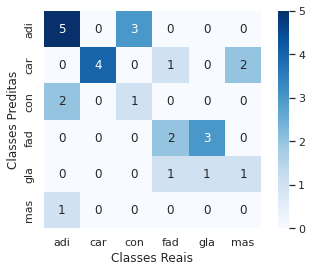

In [17]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_encoded, preds)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=True,
            xticklabels=label_encoder.inverse_transform(np.unique(y_test_encoded)),
            yticklabels=label_encoder.inverse_transform(np.unique(preds)),
            cmap=plt.cm.Blues)
plt.xlabel('Classes Reais')
plt.ylabel('Classes Preditas');

## OPF não supervisionado